## Example to load the network, sample 4 levels at random from the latent space and then plot them using matplotlib.


In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
!ls

all_levels_onehot.npz		   plotting_utilities.py  sprites
example_sampling_random_levels.py  __pycache__		  train_vae.py
lab6.ipynb			   readme.md		  vae_mario.py
models				   requirements.txt


In [71]:
#!cp 'path/to/file' 'path/to/drive'

In [72]:
import os
os.chdir("drive/My Drive/DLGS/Exercises/lab6_google_colab/exercise_DL_pcg")


FileNotFoundError: ignored

In [73]:
!ls

all_levels_onehot.npz		   plotting_utilities.py  sprites
example_sampling_random_levels.py  __pycache__		  train_vae.py
lab6.ipynb			   readme.md		  vae_mario.py
models				   requirements.txt


In [74]:
import os
import torch
import matplotlib.pyplot as plt

from vae_mario import VAEMario
from plotting_utilities import plot_decoded_level

In [75]:
# Loading the model
model_name = "mario_vae_zdim_2_overfitted"
z_dim = 2
vae = VAEMario(z_dim=z_dim)
vae.load_state_dict(torch.load(f"./models/{model_name}.pt"))


VAEMario(
  (encoder): Sequential(
    (0): Linear(in_features=2156, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2156, bias=True)
  )
)


<All keys matched successfully>

In [89]:
# Sampling random zs
zs = 2.5 * torch.randn((4, z_dim))


levels = vae.decode(zs)
level_1 = levels[0]
target = torch.argmax(level_1, dim=0)
target


tensor([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [57]:

#z = torch.randn(z_dim)
#levels = list(map(vae.decode, zs))
#loss = lambda level: torch.mean((target - level) **2)

loss = lambda level: torch.mean((target - level) **2).detach().item()
#list(map(loss, levels))
list(map(round, map(loss, levels)))

#torch.argmin(torch.tensor(list(map(loss, levels))))


[625, 1100, 1107, 530]

In [92]:
z = torch.randn(z_dim)

output = torch.argmax(vae.decode(z)[0], dim=0)
output
#target
#(output == target).int()
#zs = [z + 0.1 * torch.randn(2) for z in range(10)]
#z2 = zs[0]
#z2
#output2 = torch.argmax(vae.decode(zs[0]), dim=0)
#output2 = torch.argmax(vae.decode(z2)[0], dim=0)
#output2
#(output2 == target).int()

#mapped map(vae.decode, zs)


#output2

tensor([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 6, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 8, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 9, 2, 2, 2, 2, 8, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [93]:
# Sampling random zs
#zs = 2.5 * torch.randn((4, z_dim))
#levels = vae.decode(zs)
#level_1 = levels[0]
#target = torch.argmax(level_1, dim=0)
#target
#torch.argmax(vae.decode(zs)[0], dim=0)
(output == target).int()

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=torch.int32)

In [77]:
# Getting levels from them using the decoder
levels = vae.decode(zs)
print(levels.shape)
level_imgs = [plot_decoded_level(level) for level in levels]


torch.Size([4, 11, 14, 14])


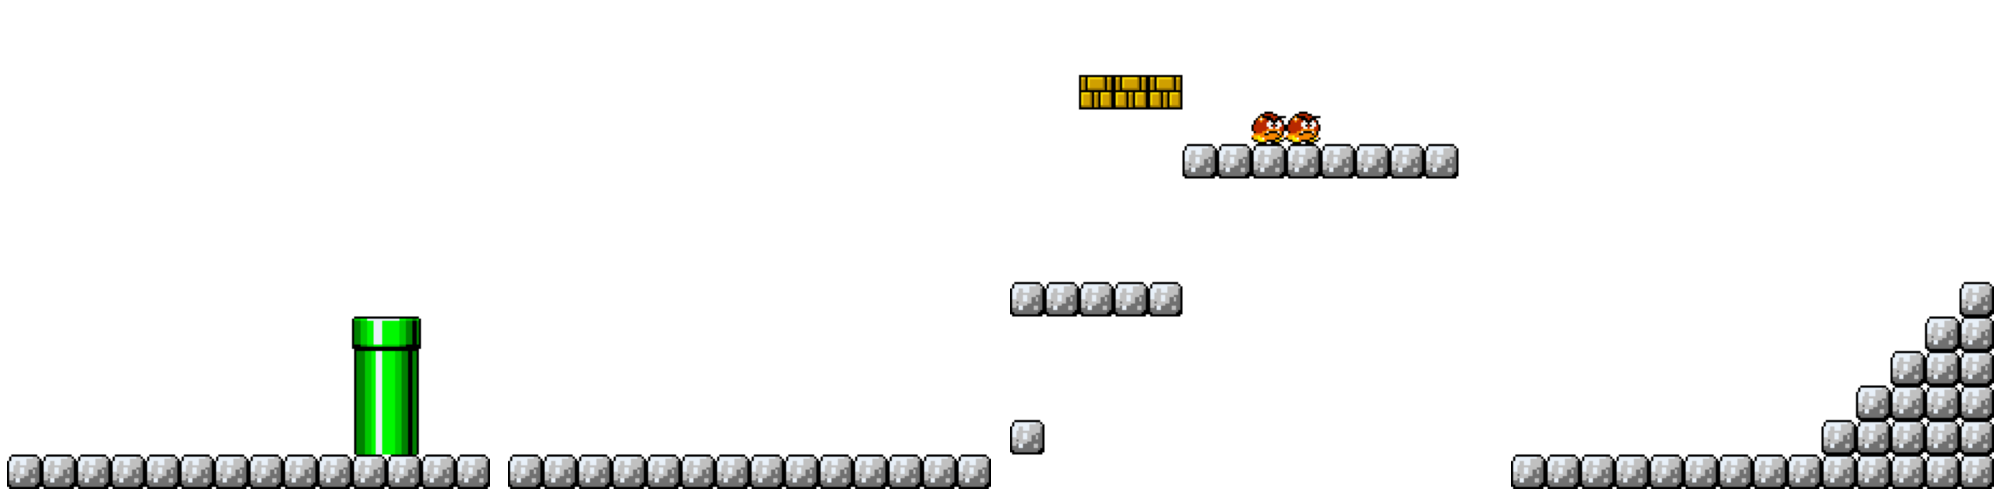

In [78]:
# Plotting
_, axes = plt.subplots(1, 4, figsize=(7 * 4, 7))
for level_img, ax in zip(level_imgs, axes):
    ax.imshow(level_img)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [37]:
#import os
#import torch
#import matplotlib.pyplot as plt

#from vae_mario import VAEMario
#from plotting_utilities import plot_decoded_level

# Loading the model
#model_name = "mario_vae_zdim_2_overfitted"
#z_dim = 2
#vae = VAEMario(z_dim=z_dim)
#vae.load_state_dict(torch.load(f"./models/{model_name}.pt"))

#target


# Sampling random zs
#zs = 2.5 * torch.randn((4, z_dim))
#levels = vae.decode(zs)
#level_1 = levels[0]
#target = torch.argmax(level_1, dim=0)
#target

#z = torch.randn(z_dim)

#output = torch.argmax(vae.decode(z)[0], dim=0)

#(output == target).int()
#zs = [z + 0.1 * torch.randn(2) for z in range(10)]
#z2 = zs[0]

#output2 = torch.argmax(vae.decode(zs[0]), dim=0)
#output2 = torch.argmax(vae.decode(z2)[0], dim=0)
#output2
#(output2 == target).int()

# Getting levels from them using the decoder
#levels = vae.decode(z2)
# print(levels.shape)
#level_imgs = [plot_decoded_level(level) for level in levels]


# Plotting
#_, axes = plt.subplots(1, 4, figsize=(7 * 4, 7))
#for level_img, ax in zip(level_imgs, axes):
#    ax.imshow(level_img)
#    ax.axis("off")

#plt.tight_layout()
#plt.show()

zs



tensor([[ 2.2160, -5.0358],
        [-1.1111,  1.1217],
        [-1.4634, -0.0760],
        [-2.4361, -1.5982]])

# Latent Variable Evolution Lab


## Sample from the VAE and then implement some search algorithm of choise to search the latent space for a particular level (e.g. one with many ground tiles)

In [116]:
import random

class LevelSample:
  def __init__(self, x):
    self.x = x  #test if x<0 is bad
    #self.vae = vae
    #self.zs = zs
    #self.levels = self.generate(vae, zs)
    
  # generates a level based on self.x as seed
  def generate_level(self):
    self.zs = self.x * torch.randn(4, z_dim)
    self.level = vae.decode(self.zs)[0]

  # returns a randomly mutated child of this levelsample
  def mutate(self, mutator):
    return LevelSample(self.x + mutator * random.uniform(-1, 1))

  # counts the number of matches between this level and target
  def evaluate(self, e_target):
    #scoreMatrix = (etarget == self.get_level).int()
    this_level = self.get_level()
    score = 0
    for i in range(len(e_target)):
      for j in range(len(e_target[0])):
        score += int(e_target[i][j] == this_level[i][j])
        #score += scoreMatrix[i][j]
    return score

  def get_level(self):
    return torch.argmax(self.level, dim=0)

  def search(self):
    return

  def plot_level(self):
    level_img = plot_decoded_level(self.level)
    fix, ax = plt.subplots()
    img = ax.imshow(level_img)
    plt.tight_layout()
    plt.show()


  1%|          | 3/500 [00:00<00:21, 23.06it/s]

  -> New best level with score:  134  x =  2.6457099264337094
  -> New best level with score:  144  x =  2.2998385999775364
  -> New best level with score:  149  x =  1.8061002799094639
  -> New best level with score:  176  x =  2.6771511016681373


  3%|▎         | 15/500 [00:00<00:19, 24.41it/s]

  -> New best level with score:  182  x =  3.0339437419613438


  8%|▊         | 42/500 [00:01<00:17, 25.64it/s]

  -> New best level with score:  184  x =  2.616287352404534


 43%|████▎     | 213/500 [00:08<00:11, 25.35it/s]

  -> New best level with score:  187  x =  2.712192949449646


 59%|█████▉    | 294/500 [00:11<00:08, 25.34it/s]

  -> New best level with score:  191  x =  3.4874908547169943


100%|██████████| 500/500 [00:19<00:00, 25.58it/s]


Best sample score =  191
with x =  3.4874908547169943


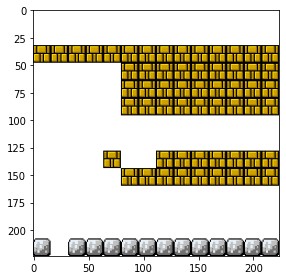

In [137]:
from tqdm import tqdm

# define some target level to compare/search for
zs = 2.5 * torch.randn(4, z_dim)
levels = vae.decode(zs)
target = torch.argmax(levels[0], dim=0)

# the map grid is 14x14, so we can stop the evolution early,
#   if we generate a map that evaluates to match 196/196
highest_potential = 196 

# run the evolution
episodes = 500
mutated_children = 10
init_sample = LevelSample(3) # init x-value
init_sample.generate_level()
current_best = init_sample

for e in tqdm(range(episodes)):
  if current_best.evaluate(target) >= highest_potential:
      print("  -> Found full match at ep: ", e, " with x = ", current_best.x)
      break
  for m in range(mutated_children):
    new_mutation = current_best.mutate(1.0) # TODO: make a smarter mutator than 1
    new_mutation.generate_level()
    if new_mutation.evaluate(target) > current_best.evaluate(target):
      current_best = new_mutation
      print("  -> New best level with score: ", current_best.evaluate(target),\
            " x = ", current_best.x)
    
  
print("Best sample score = ", current_best.evaluate(target))
print("with x = ", current_best.x)
current_best.plot_level()

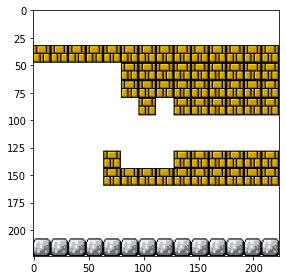

In [138]:

# plot the target map for visual comparison
level_img = plot_decoded_level(levels[0])
fix, ax = plt.subplots()
img = ax.imshow(level_img)
plt.tight_layout()
plt.show()